<h1 align="center"><strong>Relazione di Open Data Management 2023-2024</strong></h1>
<h3 align="center"><strong><em>di Daniele Nicosia e Claudio Bellanti</em></strong></h3>
<h5 align="center"><em>Università degli Studi di Palermo - Facoltà di Informatica</em></h5>

***
***

### [`1. - Traccia`](#1-traccia)
### [`2. - Selezione dei dataset`](#2-selezione-dei-dataset)
- ##### [`2.1 - Raccolta`](#21-raccolta)
- ##### [`2.2 - Licenze`](#22-licenze)
### [`3. - Elaborazione dei dataset`](#3-elaborazione-dei-dataset)
- ##### [`3.1 - Pulizia e selezione dei dati rilevanti`](#31-pulizia-e-selezione-dei-dati-rilevanti)
- ##### [`3.2 - Arricchimento`](#32-arricchimento)
### [`4. - Finalizzazione dei dataset`](#4-finalizzazione-dei-dataset)
- ##### [`4.1 - Ontologia`](#41-ontologia)
- ##### [`4.2 - Conversione in RDF`](#42-conversione-in-rdf)
### [`5. - Visualizzazione dati`](#5-visualizzazione-dati)
- ##### [`5.1 - Creazione mappe con i GeoJson`](#51-creazione-mappe-con-i-geojson)

***
***

## **`1. - Traccia`**

Utilizzando il linguaggio di programmazione Python, per lo sviluppo del progetto si devono innanzitutto rispettare i seguenti passi:

- _Selezione dati_
- _Elaborazione dati (data cleaning, definizione struttura omogenea)_
- _Open Linked Data (creazione di uno strato semantico, ontologie, interlinking)_

L'obiettivo della suddetta relazione è lo studio della qualità dell'aria nel **`Comune di Milano`** in relazione alle aree verdi presenti sul territorio, con particolare attenzione alla presenza di polveri sottili (PM10) e di biossido di azoto (NO2).

***
***

## **`2. - Selezione dei dataset`**

#### **`2.1 - Raccolta`**

Per lo sviluppo del progetto sono stati selezionati dei dataset i cui dati rappresentino gli eventi che si sono verificati nel Comune di Milano nel periodo 2014-2021. I dataset selezionati sono i seguenti:

- [**`Ricoveri ordinari apparato respiratorio 2007-2021`**](https://dati.comune.milano.it/dataset/ds1053_ricoveri-ordinari-apparato-respiratorio)
- [**`Stazioni di monitoraggio inquinanti`**](https://dati.comune.milano.it/dataset/ds484_stazioni_di_monitoraggio_inquinanti_atmosferici_dellarpa_sit)
- [**`Aree verdi`**](https://dati.comune.milano.it/dataset/ds339-territorioambiente-aree-verdi-zona-superficie-2014)
- [**`Ricostruzione della popolazione 2002-2019`**](https://demo.istat.it/app/?i=RIC&l=it)
  - Per questo dataset è stato necessario effettuare una personalizzazione tramite l'interfaccia di ISTAT. Il dataset risultante contiene la popolazione residente nel solo Comune di Milano dal 2002 al 2019.
- [**`Popolazione residente 2019-2023`**](https://demo.istat.it/app/?i=POS&l=it)
  - Per questo dataset è stato necessario effettuare una personalizzazione tramite l'interfaccia di ISTAT. Il dataset risultante contiene la popolazione residente nel solo Comune di Milano dal 2020 al 2022.

***


#### **`2.2 - Licenze`**

Le licenze dei dataset selezionati sono le seguenti:

- **`Ricoveri ordinari apparato respiratorio 2007-2021`**: Creative Commons Attribuzione-Condividi allo stesso modo 3.0 Italia ([CC BY-SA 3.0 IT](https://creativecommons.org/licenses/by-sa/3.0/it/))
- **`Stazioni di monitoraggio inquinanti`**: Creative Commons Attribuzione 4.0 Internazionale ([CC BY 4.0](https://creativecommons.org/licenses/by/4.0/))
- **`Aree verdi`**: Creative Commons Attribuzione 4.0 Internazionale ([CC BY 4.0](https://creativecommons.org/licenses/by/4.0/))
- **`Ricostruzione della popolazione 2002-2019`**: Creative Commons Attribuzione 3.0 ([CC BY 3.0](https://www.istat.it/it/note-legali))
- **`Popolazione residente 2019-2023`**: Creative Commons Attribuzione 3.0 ([CC BY 3.0](https://creativecommons.org/licenses/by/3.0/))

***
***


## **`3. - Elaborazione dei dataset`**

#### **`3.1 - Pulizia e selezione dei dati rilevanti`**

Il primo passo effettuato è stato unire i diversi dataset della popolazione residente nel Comune di Milano, in un unico dataset.

Si è notato che i dataset puri non erano tutti adattati allo stesso modo, infatti, si sono riscontrate due problematiche:

- Encoding dei dataset differenti, a causa delle loro diversi origini
- Errori vari dovuti a `;` o `,` non correttamente inseriti

##### *`Preparazione ambiente di sviluppo`*

Prima di cominciare ad analizzare i dati dobbiamo importare le librerie necessarie al nostro scopo.



In [ ]:
%pip install -r requirements.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re
import json
import plotly.graph_objects as go

##### *`Creazione dataset rilevazione della qualità dell'aria`*

In questo estratto di codice, ci siamo concentrati sull'elaborazione di un insieme di dati complesso riguardante la qualità dell'aria, raccolto nel corso di diversi anni. Questi dati provengono da molteplici stazioni che, è importante notare, hanno capacità di rilevamento diverse. Non tutte le stazioni sono equipaggiate per misurare ogni tipo di inquinante, il che introduce una certa variabilità nei dati che stiamo trattando.

Il primo passo significativo nel nostro processo è stato unire questi diversi file di dati, ognuno contenente frammenti del quadro generale della qualità dell'aria, in un unico, coerente DataFrame. Questo non solo ha semplificato le fasi successive dell'analisi, ma ha anche assicurato che ogni pezzo di informazione fosse contestualizzato all'interno del dataset più ampio.

Una volta consolidati i dati, abbiamo affrontato la questione della uniformità temporale, assicurandoci che ogni data fosse in un formato standard e ordinando poi il dataset in ordine cronologico. Questo ordine temporale è essenziale per qualsiasi analisi storica o trend che potrebbe emergere da questi dati.

Il problema successivo che abbiamo affrontato è stato quello dei valori mancanti, un'incidenza comune nei grandi set di dati, specialmente quando si tratta di rilevamenti ambientali su più anni. La strategia adottata qui è stata calcolare la mediana dei valori per ogni inquinante per ogni anno, una tecnica scelta per la sua resistenza agli outlier, ovvero quei valori che differiscono significativamente dalla norma e che potrebbero distorcere i risultati se non trattati correttamente.

Utilizzando le mediane annuali, abbiamo potuto imputare valori ragionevoli nei casi in cui i dati erano mancanti, mantenendo l'integrità generale dei dati senza concedere un peso eccessivo a misurazioni anomale o inaccurate. Questo passaggio è essenziale per mantenere la validità delle nostre conclusioni finali.

Dopo aver riempito questi vuoti, il nostro set di dati era quasi pronto per essere utilizzato in analisi future. Abbiamo rimosso alcune colonne superflue per rendere il dataset più snello e abbiamo gestito eventuali valori mancanti residui, assicurandoci che fossero chiaramente indicati.

***

In [ ]:
file_paths = glob.glob('./data/raw/rilevazione_qualità_aria/*.csv')

# Carica tutti i file CSV in un dizionario di DataFrame, specificando il separatore corretto
dfs = {fp: pd.read_csv(fp, sep=';') for fp in file_paths}

# Concatena tutti i DataFrame in un unico DataFrame
air_quality = pd.concat(dfs.values(), ignore_index=True)

# Converti la colonna 'data' in datetime se non lo è già
air_quality['data'] = pd.to_datetime(air_quality['data'])

# Ordina il DataFrame in base alla colonna 'data' in ordine crescente
air_quality.sort_values('data', ascending=True, inplace=True)

# Carica il file delle stazioni meteorologiche (adattalo al tuo percorso file)
stazioni = pd.read_csv('./data/raw/rilevazione_qualità_aria/stazioni_metereologiche.csv')

# Estraiamo gli inquinanti che ogni stazione può misurare e creiamo un dizionario
stazioni['inquinanti'] = stazioni['inquinanti'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
dict_stazioni_inquinanti = stazioni.set_index('id_amat')['inquinanti'].to_dict()

# Crea un nuovo DataFrame pivotato
air_quality_pivoted = pd.pivot_table(air_quality, values='valore', index=['stazione_id', 'data'], columns='inquinante').reset_index()
air_quality_pivoted['data'] = pd.to_datetime(air_quality_pivoted['data'])
air_quality_pivoted.sort_values('data', ascending=True, inplace=True)

# Estrai l'anno da ogni data
air_quality_pivoted['year'] = air_quality_pivoted['data'].dt.year

# Calcolo delle mediane annuali e riempimento dei valori NaN
annual_medians = {}
for stazione_id, inquinanti in dict_stazioni_inquinanti.items():
    for inquinante in inquinanti:
        if inquinante in air_quality_pivoted.columns:
            data_grouped = air_quality_pivoted[air_quality_pivoted['stazione_id'] == stazione_id].groupby('year')
            medians_by_year = data_grouped[inquinante].median()

            for year, median in medians_by_year.items():
                annual_medians[(stazione_id, inquinante, year)] = median

for key, median in annual_medians.items():
    stazione_id, inquinante, year = key
    mask = (air_quality_pivoted['stazione_id'] == stazione_id) & \
           (air_quality_pivoted['year'] == year) & \
           (air_quality_pivoted[inquinante].isna())
    
    air_quality_pivoted.loc[mask, inquinante] = median

# Rimozione della colonna 'year' dopo aver completato le operazioni di imputazione
air_quality_pivoted = air_quality_pivoted.drop(columns='year')
air_quality_pivoted = air_quality_pivoted.fillna(0)

# Salvataggio del DataFrame aggiornato
air_quality_pivoted.to_csv('./data/processed/rilevazione_qualità_aria/air_quality_pivoted.csv', index=False, na_rep='NaN')

##### *`Creazione dataset GeoJson stazioni metereologiche`*

Il codice qui presentato si occupa essenzialmente di trasformare un elenco di stazioni meteorologiche, con varie informazioni associate, in un formato facilmente utilizzabile per applicazioni geospaziali. Inizialmente, vengono eliminate alcune informazioni non necessarie, concentrando l'attenzione su dati più pertinenti, come la posizione geografica di ogni stazione.

Una parte cruciale di questo processo riguarda la manipolazione delle coordinate geografiche. Dal momento che le posizioni sono state fornite come testo, il codice le converte in formato GeoJSON; uno standard specifico per i dati geografici.
Questo formato è particolarmente utile perché è ampiamente riconosciuto e utilizzato in molte applicazioni di mappatura, rendendo i dati facilmente accessibili e utilizzabili.
Alla fine di questa procedura avremo la possibilità, attraverso librerie e strumenti online, di ottenere una mappa con i nostri specifici "Point" e i relativi metadati.

In [ ]:
stazioni_metereologiche = pd.read_csv('./data/raw/rilevazione_qualità_aria/stazioni_metereologiche.csv')
# Rimuovo le colonne non necessarie
stazioni_metereologiche.drop(columns=['Location', '_id', 'inizio_operativita', 'fine_operativita'], inplace=True)
# Rinomino le colonne
stazioni_metereologiche.rename(columns={'LONG_X_4326': 'longitudine', 'LAT_Y_4326': 'latitudine'}, inplace=True)

# Crea la struttura base GeoJSON
geojson = {
    "type": "FeatureCollection",
    "features": []
}

# Popola GeoJSON con le features
for index, row in stazioni_metereologiche.iterrows():
    feature = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [row['longitudine'], row['latitudine']]
        },
        "properties": row.drop(['latitudine', 'longitudine']).to_dict()
    }
    geojson["features"].append(feature)

# Salva il GeoJSON in un file
with open("./data/processed/rilevazione_qualità_aria/stazioni_metereologiche.geojson", 'w') as f:
    json.dump(geojson, f)

stazioni_metereologiche.to_csv('./data/processed/rilevazione_qualità_aria/stazioni_metereologiche.csv', index=False, na_rep='NaN')

##### *`Creazione dataset GeoJson aree verdi`*

Al fine di effettuare una analisi completa, abbiamo optato di inserire all'interno dell'analisi anche le aree verdi di Milano.
In questo caso abbiamo prelevato i dati forniti in CSV dal comune di Milano e ne abbiamo realizzato un Geo JSON.

In [ ]:
aree_verdi = pd.read_csv('./data/raw/rilevazione_qualità_aria/aree_verdi.csv')
# Rimuovo le colonne non necessarie
aree_verdi = aree_verdi.drop(columns=['Location'])
# Rinomino le colonne
aree_verdi = aree_verdi.rename(columns={'LONG_X_4326_CENTROID': 'LONGITUDINE', 'LAT_Y_4326_CENTROID': 'LATITUDINE', '_id': 'ID'})

# Crea la struttura base GeoJSON
geojson_aree_verdi = {
    "type": "FeatureCollection",
    "features": []
}

# Popola GeoJSON con le features
for index, row in aree_verdi.iterrows():
    feature = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [row['LONGITUDINE'], row['LATITUDINE']]
        },
        "properties": row.drop(['LATITUDINE', 'LONGITUDINE']).to_dict()  # escludi le colonne non necessarie
    }
    geojson_aree_verdi["features"].append(feature)

# Salva il GeoJSON in un file
with open("./data/processed/rilevazione_qualità_aria/aree_verdi.geojson", 'w') as f:
    json.dump(geojson_aree_verdi, f)
    
aree_verdi.to_csv('./data/processed/rilevazione_qualità_aria/aree_verdi.csv', index=False, na_rep='NaN')

##### *`Creazione dataset popolazione`*

Il dataset in questione è stato ottenuto, innanzitutto, rimuovendo le colonne degli anni che non ci interessava analizzare. Successivamente, è stato necessario unire dei dataset poichè sono stati cambiati i metadati e la loro disposizione negli anni successivi al 2019.

In [ ]:
percorso_input = './data/raw/popolazione/'
percorso_output = './data/processed/popolazione/'

popolazione = pd.read_csv(percorso_input + 'ricostruzione_popolazione_2002_2019.csv')

anni = np.arange(2014, 2021)
for col in popolazione.columns:
    try:
        year = int(col)
        if year not in anni:
            popolazione = popolazione.drop(columns=col)
    except ValueError:
        pass


file_list = os.listdir(percorso_input)
popolazione_files = [f for f in file_list if f.startswith('popolazione')]

prev_age = None
curr_row = None

for filename in popolazione_files:
    new_pop = pd.read_csv(os.path.join(percorso_input, filename))

    year = filename[-8:-4]
    popolazione[year] = 0

    for index, row in popolazione.iterrows():
        age = row['Età']
        if age != prev_age:
            curr_row = new_pop.loc[new_pop['Età'] == age].iloc[0]
            prev_age = age

        if popolazione.loc[index, 'Sesso'] == 'Maschi':
            popolazione.loc[index, year] = curr_row['Totale maschi']
        elif popolazione.loc[index, 'Sesso'] == 'Femmine':
            popolazione.loc[index, year] = curr_row['Totale femmine']
        else:
            popolazione.loc[index, year] = curr_row['Totale']

popolazione.to_csv(percorso_output + 'popolazione_2014_2021.csv', index=False)

##### *`Creazione dataset ricoveri`*

Per il dataset dei ricoveri, poichè i dati erano già in un formato accettabile, è stato necessario solo rimuovere le colonne e le righe non necessarie.

In [ ]:
percorso_input = './data/raw/ricoveri/'
percorso_output = './data/processed/ricoveri/'

ricoveri = pd.read_csv(percorso_input + 'ricoveri_ordinari_apparato_respiratorio.csv', sep=';')

# Rimuovo le righe degli anni precedenti al 2014
ricoveri = ricoveri[ricoveri['anno'] >= 2014]

# Rimuovo la colonna della misura utilizzata
ricoveri = ricoveri.drop(columns='misura')

ricoveri.to_csv(percorso_output + 'ricoveri_2014_2021.csv', index=False)

***
***

## **`4. - Finalizzazione dei dataset`**

#### **`4.1 - Ontologia`**

L'ontologia progettata in questione è di tipo `OWL` ed è stata realizzata, con l'ausilio del software `Protégé`, in modo da poter essere utilizzata per la rappresentazione di dati relativi alla qualità dell'aria in un determinato comune. 

Nell'ontologia sono state rappresentate le seguenti entità:

- **`Comune`**: che rappresenta i comuni.
- **`Popolazione`**: che rappresenta la popolazione.
- **`AreaVerde`**: che rappresenta le aree verdi.
- **`StazioneMeteorologica`**: che rappresenta le stazioni meteorologiche.
- **`MisurazioneQualitaAria`**: che rappresenta le misurazioni della qualità dell'aria.

Inoltre le proprietà rappresentate nell'ontologia sono:

- **`haRicoveri`**: Rappresenta il numero di ricoveri associati ad una popolazione.
- **`haPopolazione`**: Stabilisce il numero di abitanti per un dato comune.
- **`haAreaVerde`**: Indica la presenza di aree verdi all'interno di un comune.
- **`haStazioneMeteorologica`**: Rappresenta la presenza di stazioni meteorologiche in un comune.
- **`haCoordinate`**: Indica la posizione geografica di una stazione meteorologica o di un'area verde.
- **`monitoraInquinante`**: Specifica l'inquinante specifico misurato da una stazione meteorologica.
- **`haValoreInquinante`**: Indica il valore numerico effettivo di una misurazione della qualità dell'aria registrato da una stazione meteorologica.
- **`haQualitaAria`**: Collega un'area verde alle misurazioni della qualità dell'aria effettuate in quella zona.


L'ontologia descritta è stata realizzata nel formato `.ttl` ed è riportata in [**`questo file`**](ontologia.ttl).

***

#### **`4.2 - Conversione in RDF`**

In [ ]:
from urllib import parse 
from rdflib import Graph, Literal, URIRef, Namespace, BNode
from rdflib.namespace import RDF, OWL, RDFS
from SPARQLWrapper import SPARQLWrapper, JSON
from rdflib import XSD
import pandas as pd

# Preparo il grafo
g = Graph()

base_uri = "http://www.qualitaariamilano.it/resource/"

sso = Namespace("http://www.semanticweb.org/aria-ontology-cb-dn/ontology/")
g.bind("sso", sso)

ssr = Namespace("http://www.semanticweb.org/aria-ontology-cb-dn/resource/")
g.bind("ssr", ssr)

def urify(uri, res):
    res = str(res).replace(" ","_").replace("\'","")
    return uri + parse.quote(res)

In [ ]:
# Carica il dataset sulla qualità dell'aria
import time

# Prepara i namespace
wd = Namespace("http://www.wikidata.org/entity/")

# Prepara la query SPARQL
def get_wikidata_uris(pollutant_names):
    uris = []
    for pollutant_name in pollutant_names:
        sparql_query = """
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        SELECT ?item WHERE {{
        ?item rdfs:label "{0}"@en.
        }}
        LIMIT 1
        """.format(pollutant_name["name"])  # Non codificare qui, SPARQLWrapper gestisce già l'encoding
        sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
        sparql.setQuery(sparql_query)
        sparql.setReturnFormat(JSON)
        print(f"Querying {pollutant_name['name']}...")
        try:
            results = sparql.query().convert()
            for result in results["results"]["bindings"]:
                uris.append(result["item"]["value"])
                time.sleep(2)
                break  # Break here ensures that only the first result is taken
        except Exception as e:
            print(f"An error occurred while querying {pollutant_name['name']}: {e}")
            uris.append(None)  # Append None if there was an error or no result

    return uris

# Utilizza la nuova funzione per ottenere tutti gli URI
arr_inquinanti = [
    { "name": "benzene", "formula": "C6H6" },
    { "name": "carbon monoxide", "formula": "CO" },
    { "name": "nitrogen dioxide", "formula": "NO2" },
    { "name": "ozone", "formula": "O3" },
    { "name": "PM10 (excluding PM 2.5)", "formula": "PM10" },
    { "name": "PM 2.5", "formula": "PM25" },
    { "name": "sulfur dioxide", "formula": "SO2" }
]
pollutant_uris = get_wikidata_uris(arr_inquinanti)

# Ora puoi iterare su pollutant_uris e creare le tue triple RDF
for pollutant, pollutant_uri in zip(arr_inquinanti, pollutant_uris):
    if pollutant_uri:
        # Crea l'URIRef con l'URI trovato
        pollutant_uri_ref = URIRef(pollutant_uri)
        formula_uri_ref = URIRef(f"{base_uri}{pollutant['formula']}")
        # Aggiungi le triple al grafo
        g.add((pollutant_uri_ref, RDF.type, OWL.Thing))
        g.add((pollutant_uri_ref, RDFS.label, Literal(pollutant["name"])))
        g.add((pollutant_uri_ref, sso.chemicalFormula, Literal(pollutant["formula"])))
        g.add((pollutant_uri_ref, OWL.sameAs, formula_uri_ref))
        
print(g.serialize(format="turtle"))

In [ ]:
popolazione_df = pd.read_csv('./data/processed/popolazione/popolazione_totale_2014_2021.csv')
ricoveri_df = pd.read_csv('./data/processed/ricoveri/ricoveri_2014_2021.csv')
stazioni_metereologiche_df = pd.read_csv('./data/processed/rilevazione_qualità_aria/stazioni_metereologiche.csv')
res = URIRef(urify(base_uri, "Milano"))

haStazioniMetereologiche = BNode()

def addSingleComuneTriple(popolazione_df):
    #g.add([res, RDF.type, sso.Comune])
    for index, row in popolazione_df.iterrows():
        anno = row['Anno']
        popolazione = row['Totale']
        # Creazione di un Blank Node per ogni anno
        popolazione_node = BNode()
        g.add([res, sso.haPopolazione, popolazione_node])
        g.add([popolazione_node, sso.anno, Literal(anno, datatype=XSD.gYear)])
        g.add([popolazione_node, sso.totalePopolazione, Literal(popolazione, datatype=XSD.integer)])
        # Aggiunta degli ID delle stazioni metereologiche
    for index, row in ricoveri_df.iterrows():
        anno = row['anno']
        ricoveri = row['Totale']
        # Creazione di un Blank Node per ogni anno
        ricoveri_node = BNode()
        g.add([res, sso.haRicoveriApparatoRespiratorio, ricoveri_node])
        g.add([ricoveri_node, sso.anno, Literal(anno, datatype=XSD.gYear)])
        g.add([ricoveri_node, sso.totaleRicoveri, Literal(ricoveri, datatype=XSD.integer)])

# Applica la funzione
addSingleComuneTriple(popolazione_df)

In [ ]:
stazioni_metereologiche_df = pd.read_csv('./data/processed/rilevazione_qualità_aria/stazioni_metereologiche.csv')
base_uri_stazioni = "http://www.qualitaariamilano.it/resource/stazioni/"

for index, row in stazioni_metereologiche_df.iterrows():
    id_amat = row['id_amat']
    nome = row['nome']
    latitudine = row['latitudine']
    longitudine = row['longitudine']
    inquinanti = row['inquinanti'].split(', ')
    stazione_uri = URIRef(urify(base_uri_stazioni, id_amat))
    # Aggiungi dati al grafo g
    g.add([res, sso.haStazioneMetereologica, stazione_uri])
    g.add([stazione_uri, RDF.type, sso.StazioneMetereologica])
    g.add([stazione_uri, sso.idAmat, Literal(id_amat, datatype=XSD.integer)])
    g.add([stazione_uri, sso.nome, Literal(nome, datatype=XSD.string)])
    g.add([stazione_uri, sso.latitudine, Literal(latitudine, datatype=XSD.decimal)])
    g.add([stazione_uri, sso.longitudine, Literal(longitudine, datatype=XSD.decimal)])
    for inquinante in inquinanti:
        inquinante_uri = URIRef(urify(base_uri, inquinante))
        g.add([stazione_uri, sso.monitoraInquinante, inquinante_uri])
    
print(g.serialize(format="turtle"))

In [ ]:
from urllib.parse import urlparse

air_quality_df = pd.read_csv('./data/processed/rilevazione_qualità_aria/air_quality_pivoted.csv')

for index, row in air_quality_df.iterrows():
    stazione_id = int(row['stazione_id'])
    stazione_uri = URIRef(f"{base_uri_stazioni}{stazione_id}")
    data = row['data']
    stazione_node = BNode()
    g.add([stazione_uri, sso.haMisuraInquinante, stazione_node])
    g.add([stazione_node, sso.data, Literal(data, datatype=XSD.date)])
    # Itero le triple che rappresentano le stazioni metereologiche
    for s, p, o in g.triples((stazione_uri, sso.monitoraInquinante, None)):
        o_name = urlparse(str(o)).path.split('/')[-1]
        inquinante_node = BNode()
        g.add([stazione_node, sso.inquinante, inquinante_node])
        g.add([inquinante_node, sso.formula, Literal(o_name, datatype=XSD.string)])
        g.add([inquinante_node, sso.valore, Literal(row[o_name], datatype=XSD.float)])
    
print(g.serialize(format='turtle'))

In [ ]:
base_uri_aree_verdi = "http://www.qualitaariamilano.it/resource/aree_verdi/"

aree_verdi_df = pd.read_csv('./data/processed/rilevazione_qualità_aria/aree_verdi.csv')

for index, row in aree_verdi_df.iterrows():
    area_verde_uri = URIRef(urify(base_uri_aree_verdi, row['ID']))
    g.add([area_verde_uri, RDF.type, sso.AreaVerde])
    g.add([area_verde_uri, sso.nome, Literal(row['PARCO'], datatype=XSD.string)])
    g.add([area_verde_uri, sso.latitudine, Literal(row['LATITUDINE'], datatype=XSD.decimal)])
    g.add([area_verde_uri, sso.longitudine, Literal(row['LONGITUDINE'], datatype=XSD.decimal)])
    g.add([area_verde_uri, sso.codiceArea, Literal(row['CODICE_AREA'], datatype=XSD.integer)])
    g.add([area_verde_uri, sso.zona, Literal(row['ZONA'], datatype=XSD.integer)])
    g.add([area_verde_uri, sso.area, Literal(row['AREA_MQ'], datatype=XSD.decimal)])
    g.add([area_verde_uri, sso.perimetro, Literal(row['PERIM_M'], datatype=XSD.decimal)])
    g.add([res, sso.haAreaVerde, area_verde_uri])
    
print(g.serialize(format='turtle'))

In [ ]:
# Salva il grafo RDF
g.serialize(destination='./data/ontology/ontologia.ttl', format='turtle')

***
***

## **`5. - Visualizzazione dati`**

#### **`5.1 - Creazione mappe con i GeoJson`**

##### Evoluzione della Popolazione e Ricoveri Respiratori nel Comune di Milano (2014-2021)

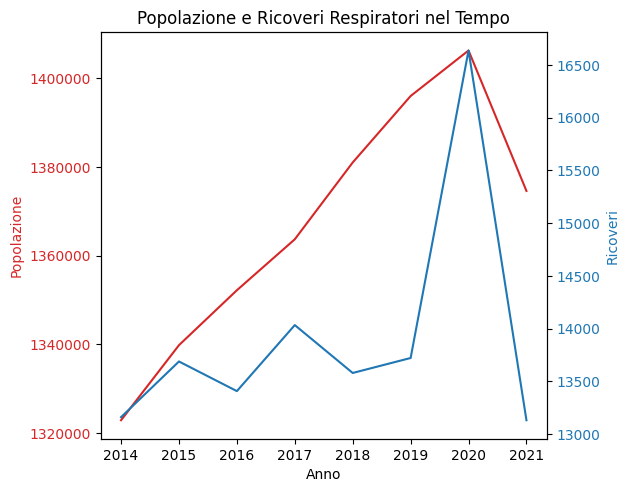

In [97]:
from matplotlib.ticker import FuncFormatter
import pandas as pd

query = """
PREFIX sso: <http://www.semanticweb.org/aria-ontology-cb-dn/ontology/>
SELECT ?anno ?popolazione ?totaleRicoveri
WHERE {
    ?comune sso:haPopolazione ?popNode .
    ?popNode sso:anno ?anno ;
             sso:totalePopolazione ?popolazione .
    OPTIONAL {
        ?comune sso:haRicoveriApparatoRespiratorio ?ricNode .
        ?ricNode sso:anno ?anno ;
                 sso:totaleRicoveri ?totaleRicoveri .
    }
}
ORDER BY ?anno
"""

def millions_formatter(x, pos):
    return '%1.0f' % x

result = g.query(query)

# Prepara i dati per il plot
totali = []
for row in result:
    totali.append({
        'anno': str(row.anno),
        'popolazione': int(row.popolazione) if row.popolazione is not None else 0,
        'ricoveri': int(row.totaleRicoveri) if row.totaleRicoveri is not None else 0
    })
    
totali = pd.DataFrame(totali)

# Creazione del grafico
fig, ax1 = plt.subplots()
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
color = 'tab:red'
ax1.set_xlabel('Anno')
ax1.set_ylabel('Popolazione', color=color)
ax1.plot(totali['anno'], totali['popolazione'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Istanziare un secondo asse per i ricoveri
color = 'tab:blue'
ax2.set_ylabel('Ricoveri', color=color)
ax2.plot(totali['anno'], totali['ricoveri'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Popolazione e Ricoveri Respiratori nel Tempo')
plt.show()

Nel grafico soprastante è possibile osservare l'evoluzione della popolazione e dei ricoveri respiratori nel Comune di Milano nel periodo 2014-2021. Si può notare come la popolazione sia in costante crescita, mentre i ricoveri respiratori siano in diminuzione. Notiamo un picco nell'anno 2020 che potrebbe essere dovuto alla pandemia di COVID-19.

In [98]:
import plotly.graph_objects as go

# Dati di esempio presi dal 2020
rigaRiferimento = totali.loc[totali['anno'] == '2020'].squeeze()

# Calcoliamo la percentuale di ricoveri rispetto alla popolazione totale
perc = (rigaRiferimento['ricoveri'] / rigaRiferimento['popolazione']) * 100

# Creiamo il grafico a torta
fig = go.Figure(data=[go.Pie(labels=['Popolazione', 'Ricoveri Respiratori'],
                             values=[rigaRiferimento['popolazione'], perc],
                             hole=0.3, textinfo='label+percent', pull=[0, 0.2])])

# Aggiungiamo il titolo
fig.update_layout(title_text="Distribuzione della Popolazione e dei Ricoveri per Apparato Respiratorio nell'anno 2020")

# Mostrare il grafico
fig.show()

Nel grafico soprastante è stata messa il relazione la popolazione residente nel Comune di Milano con i ricoveri per patologie respiratorie. Si può notare come il valore sia nettamente inferiore se paragonato al totale della popolazione, nonostante sia comunque un numero (circa 15000 l'anno) significativo.

##### Variazioni Stagionali della Qualità dell'Aria: Un'Analisi Mensile degli Inquinanti nel Comune di Milano

In [99]:
import pandas as pd
import plotly.express as px
from rdflib import Graph, URIRef, Literal, Namespace
from rdflib.namespace import RDF, XSD

# Esegui la query sul tuo grafo RDF
query = """
PREFIX sso: <http://www.semanticweb.org/aria-ontology-cb-dn/ontology/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?stazione ?data ?formula ?valore
WHERE {
    ?stazione sso:haMisuraInquinante ?misura .
    ?misura sso:data ?data ;
            sso:inquinante ?inquinante .
    ?inquinante sso:formula ?formula ;
                sso:valore ?valore .
}
ORDER BY ?stazione ?data
"""
result = g.query(query)

# Preparazione dei dati per il grafico
data = []
for row in result:
    stazione = str(row.stazione)
    data_misurazione = row.data.toPython() if isinstance(row.data, Literal) else None
    formula = str(row.formula)
    valore = float(row.valore) if isinstance(row.valore, Literal) else None
    if data_misurazione:
        data.append({
            'Stazione': stazione,
            'Data': data_misurazione,
            'Inquinante': formula,
            'Valore': valore
        })

df = pd.DataFrame(data)

# Assicurati che la colonna 'Data' sia convertita in datetime
df['Data'] = pd.to_datetime(df['Data'])

# Creazione delle colonne 'Anno' e 'Mese'
df['Anno'] = df['Data'].dt.year
df['Mese'] = df['Data'].dt.month

# Calcolo della media mensile per ogni anno e inquinante
df_media = df.groupby(['Anno', 'Mese', 'Inquinante']).agg({'Valore': 'mean'}).reset_index()

# Creazione del grafico
fig = px.line(df_media, x='Mese', y='Valore', color='Inquinante', 
              title='Media Mensile per Inquinante per Anno',
              labels={'Valore': 'Media dei Valori'}, 
              animation_frame='Anno', 
              category_orders={'Mese': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

# Mostra il grafico
fig.show()

Nel grafico soprastante possiamo osservare l'andamento stagionale dei principali inquinanti presenti nell'aria del Comune di Milano. Si può notare come i valori di PM10 e NO2 siano più alti nei mesi invernali, mentre i valori di O3 siano più alti nei mesi estivi.

In [100]:
import pandas as pd
import plotly.express as px
from rdflib import Graph

query = """
PREFIX sso: <http://www.semanticweb.org/aria-ontology-cb-dn/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT ?stazione ?idAmat ?inquinante
WHERE {
    ?stazione sso:haStazioneMetereologica ?dettagliStazione .
    ?dettagliStazione sso:idAmat ?idAmat ;
                      sso:monitoraInquinante ?inquinante .
}
"""
result = g.query(query)

# Preparazione dei dati per il grafico
data = []
for row in result:
    stazione = str(row.stazione)
    id_amat = str(row.idAmat)
    inquinante = str(row.inquinante)
    data.append({'Stazione': stazione, 'ID AMAT': id_amat, 'Inquinante': inquinante})

df = pd.DataFrame(data)

# Conteggio del numero di stazioni per ogni inquinante
#Per ogni inquinante eliminare tutto ciò che è uri e mantenere solo il nome
df['Inquinante'] = df['Inquinante'].apply(lambda x: x.split('/')[-1])
conteggio_inquinanti = df.groupby('Inquinante').count()['Stazione'].reset_index()
conteggio_inquinanti.rename(columns={'Stazione': 'Numero di Stazioni'}, inplace=True)

# Creazione del grafico a barre
fig = px.bar(conteggio_inquinanti, x='Inquinante', y='Numero di Stazioni',
             title='Numero di Stazioni per Ogni Inquinante',
             labels={'Inquinante': 'Inquinante', 'Numero di Stazioni': 'Numero di Stazioni'})
fig.show()

Nel grafico soprastante è presente un confronto di quali inquinanti siano più monitorati dalle varie stazioni metereologiche. Si può notare come il NO2 sia l'inquinante più monitorato, seguito dal PM10 e dalla CO.

In [101]:
from rdflib import Graph
import plotly.graph_objects as go

# Query SPARQL per ottenere la somma totale dell'area delle aree verdi
query_area_verde = """
PREFIX sso: <http://www.semanticweb.org/aria-ontology-cb-dn/ontology/>
SELECT (SUM(?area) AS ?areaTotale)
WHERE {
    ?comune sso:haAreaVerde ?areaVerde .
    ?areaVerde sso:area ?area .
}
"""

# Esegui la query e ottieni il risultato
result_area_verde = g.query(query_area_verde)

# Estrai il valore numerico dell'area totale
area_totale_aree_verdi = 0
for row in result_area_verde:
    area_totale_aree_verdi = row.areaTotale.toPython()

# Query SPARQL per ottenere la popolazione di Milano per un anno specifico (es. 2020)
query_popolazione = """
PREFIX sso: <http://www.semanticweb.org/aria-ontology-cb-dn/ontology/>
SELECT (SUM(?popolazione) AS ?popolazioneTotale)
WHERE {
    ?comune sso:haPopolazione ?popNode .
    ?popNode sso:anno "2020"^^<http://www.w3.org/2001/XMLSchema#gYear> ;
             sso:totalePopolazione ?popolazione .
}
"""

# Esegui la query e ottieni il risultato
result_popolazione = g.query(query_popolazione)

popolazione_totale_milano = 0
for row in result_popolazione:
    popolazione_totale_milano = row.popolazioneTotale.toPython()

# Calcolo dell'area verde per abitante
area_verde_per_abitante = area_totale_aree_verdi / popolazione_totale_milano if popolazione_totale_milano > 0 else 0

# Standard OMS per area verde per abitante (9 m²)
standard_oms = 9

# Creazione del grafico
fig = go.Figure(data=[
    go.Bar(name='Area Verde per Abitante', x=['Milano'], y=[area_verde_per_abitante]),
    go.Bar(name='Standard OMS', x=['Standard OMS'], y=[standard_oms])
])

fig.update_layout(title='Confronto tra Area Verde per Abitante a Milano e Standard OMS (Anno 2020)',
                  yaxis_title='Area Verde per Abitante (m²)',
                  xaxis={'categoryorder':'total descending'})

# Mostra il grafico
fig.show()


Il grafico presentato confronta l'area verde disponibile per abitante a Milano con lo standard raccomandato dall'Organizzazione Mondiale della Sanità (OMS) di 9 metri quadrati per abitante.
Dall'analisi emerge che a Milano ci sono circa 5 metri quadrati di area verde per abitante, un valore inferiore agli 9 metri quadrati raccomandati dall'OMS. Questo dato suggerisce che: c'è spazio per miglioramenti per raggiungere o superare lo standard internazionale. Questa scoperta potrebbe servire da stimolo per ulteriori iniziative di pianificazione urbana e ambientale volte ad aumentare la quantità e la qualità delle aree verdi nella città, al fine di promuovere un ambiente urbano più salubre e sostenibile per i suoi abitanti.
La popolazione tenuta in considerazione per questa analisi è quella del 2020.

In [102]:
# Query for retrieving weather stations
query_stazioni = """
PREFIX sso: <http://www.semanticweb.org/aria-ontology-cb-dn/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT ?idAmat ?longitudine ?latitudine ?nome
WHERE {
    ?stazione sso:haStazioneMetereologica ?dettagliStazione .
    ?dettagliStazione sso:idAmat ?idAmat ;
                      sso:longitudine ?longitudine ;
                      sso:latitudine ?latitudine ;
                      sso:nome ?nome .
}
"""
result_stazioni = g.query(query_stazioni)

# Query for retrieving green areas
query_aree_verdi = """
PREFIX sso: <http://www.semanticweb.org/aria-ontology-cb-dn/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT ?zona ?longitudine ?latitudine ?nome
WHERE {
    ?areaVerde sso:haAreaVerde ?dettagliArea .
    ?dettagliArea sso:zona ?zona ;
                  sso:longitudine ?longitudine ;
                  sso:latitudine ?latitudine ;
                  sso:nome ?nome .
}
GROUP BY ?zona
"""
result_aree_verdi = g.query(query_aree_verdi)

# Prepare the data for the scatter map
data = []
for row in result_stazioni:
    nome_stazione = str(row.nome)
    id_amat = str(row.idAmat)
    latitudine = float(row.latitudine)
    longitudine = float(row.longitudine)
    data.append({'nome': nome_stazione, 'id': id_amat, 'latitudine': latitudine, 'longitudine': longitudine, 'tipo': 'Stazione'})
    
for row in result_aree_verdi:
    nome_area_verde = str(row.nome)
    zona = str(row.zona)
    latitudine = float(row.latitudine)
    longitudine = float(row.longitudine)
    data.append({'nome': nome_area_verde, 'id': zona, 'latitudine': latitudine, 'longitudine': longitudine, 'tipo': 'Area Verde'})

scatter_map_df = pd.DataFrame(data)

# Create the scatter map using plotly
fig = px.scatter_mapbox(scatter_map_df, lat="latitudine", lon="longitudine", hover_name="nome", hover_data=["id"], zoom=10, height=500, color="tipo", color_discrete_map={"Stazione": "blue", "Area Verde": "green"})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.update_traces(marker=dict(size=15))

fig.show()

Nella mappa soprastante è possibile osservare la distribuzione delle stazioni metereologiche presenti nel Comune di Milano. Si può notare come le stazioni non siano propriamente distribuite in maniera omogenea su tutto il territorio comunale. Inoltre è possibile vedere anche le maggiori aree verdi presenti nel Comune. Possiamo anche osservare come alcune stazioni siano più vicine ad aree verdi rispetto ad altre. Ciò può influire sul monitoraggio degli inquinanti, in quanto le aree verdi possono influire sulla qualità dell'aria.